<a href="https://colab.research.google.com/github/itimes-digital/deep-learning-estudo/blob/main/cluster_breast_cancer_mapas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.7-cp36-none-any.whl size=8607 sha256=b0649b1dd74e098fd16ff252de7fa3f854ebcac514c76f42dce8e0a9bd7a1c4e
  Stored in directory: /root/.cache/pip/wheels/db/9a/af/0fca4ced67fec66c00998c4bf55b13f0a4c882ee775f278862
Successfully built minisom


In [25]:
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
from pylab import pcolor, colorbar, plot

In [26]:
base_x = pd.read_csv('https://raw.githubusercontent.com/itimes-digital/deep-learning-estudo/main/dataset/entradas_breast.csv')
base_x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1095.0000,0.9053,8589.0,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3398.0,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4585.0,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1156.0000,3445.0,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,0.7572,0.7813,5438.0,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


In [27]:
base_y = pd.read_csv('https://raw.githubusercontent.com/itimes-digital/deep-learning-estudo/main/dataset/saidas_breast.csv', names = ['classe'])
base_y.head()

,classe
0,0
1,0
2,0
3,0
4,0


In [43]:
base_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   classe  570 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


In [44]:
base_y.value_counts()

classe
1         357
0         213
dtype: int64

In [28]:
base_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0    radius_mean              569 non-null    float64
 1    texture_mean             569 non-null    float64
 2    perimeter_mean           569 non-null    float64
 3    area_mean                569 non-null    float64
 4    smoothness_mean          569 non-null    float64
 5    compactness_mean         569 non-null    float64
 6    concavity_mean           569 non-null    float64
 7   concave_points_mean       569 non-null    float64
 8    symmetry_mean            569 non-null    float64
 9    fractal_dimension_mean   569 non-null    float64
 10   radius_se                569 non-null    float64
 11   texture_se               569 non-null    float64
 12   perimeter_se             569 non-null    float64
 13   area_se                  569 non-null    float64
 14   smoothnes

In [29]:
base_x.shape

(569, 30)

In [67]:
celulas = 5 * np.sqrt(base_x.shape[0])
celulas

119.26860441876563

In [31]:
x = base_x.iloc[:].values

In [45]:
y = base_y.iloc[:, 0].values

In [33]:
scaler = MinMaxScaler(feature_range = (0,1))
x = scaler.fit_transform(x)
x

array([[1.03372594e-03, 2.26580994e-02, 5.45988529e-01, ...,
        9.12027491e-04, 5.58248834e-04, 3.69250425e-04],
       [1.29443102e-03, 2.72573554e-01, 6.15783291e-01, ...,
        6.39175258e-01, 5.05372410e-01, 1.96478695e-04],
       [1.20550835e-03, 3.90260399e-01, 5.95743211e-01, ...,
        8.35051546e-01, 3.76578924e-04, 1.88152346e-04],
       ...,
       [8.93268555e-04, 6.21237741e-01, 4.45788128e-01, ...,
        4.87285223e-04, 1.20071307e-04, 1.33915438e-04],
       [1.29746247e-03, 6.63510315e-01, 6.65537972e-01, ...,
        9.10652921e-01, 4.63736351e-04, 7.16672865e-01],
       [0.00000000e+00, 5.01521813e-01, 2.85398383e-02, ...,
        0.00000000e+00, 2.40142615e-04, 8.87565616e-05]])

In [75]:
som = MiniSom(x = 11,
              y = 11,
              input_len = 30,
              sigma = 3.0,
              learning_rate = 0.1,
              random_seed = 5)

som.random_weights_init(x);
som.train_random(data = x, num_iteration = 2000)

som._weights.shape

(11, 11, 30)

In [76]:
som._weights[0]

array([[5.59356581e-04, 3.75924774e-01, 2.91778778e-01, 1.76320512e-01,
        1.68450893e-02, 2.75975440e-03, 2.31986949e-02, 1.65259557e-03,
        3.87162667e-01, 1.59822167e-03, 1.37393217e-02, 2.47329558e-01,
        2.16596397e-01, 2.16415767e-02, 1.75552021e-01, 1.89043934e-02,
        6.99100397e-05, 9.34890715e-04, 1.58981464e-03, 4.19656582e-04,
        1.68394424e-03, 4.17887195e-01, 2.32265106e-01, 1.26005114e-01,
        8.71048168e-03, 2.72403606e-02, 2.40249088e-02, 3.84516928e-02,
        1.82532718e-02, 1.61530588e-03],
       [5.60679541e-04, 4.02699521e-01, 2.92601846e-01, 1.76365411e-01,
        1.30762966e-02, 3.14986391e-03, 1.84369608e-02, 1.34682008e-03,
        3.05721323e-01, 2.13684975e-03, 1.54819672e-02, 2.51946118e-01,
        2.12819637e-01, 2.98665587e-02, 1.73028388e-01, 1.49565915e-02,
        7.23739932e-05, 9.87543490e-04, 2.93755335e-03, 4.20136130e-04,
        1.19788007e-03, 4.48210277e-01, 2.34532421e-01, 1.26734367e-01,
        6.78515606e-03,

In [77]:
q = som.activation_response(x)
q

array([[35.,  0.,  1., 12., 11.,  6.,  8.,  7.,  6.,  7., 22.],
       [ 0.,  0.,  0.,  9.,  4.,  1.,  2.,  3.,  6.,  1.,  4.],
       [ 0.,  0.,  6.,  7.,  6.,  3.,  1.,  3.,  6.,  2.,  2.],
       [ 3.,  9.,  8.,  2.,  4.,  1.,  1.,  1.,  8.,  0.,  2.],
       [21.,  3.,  8.,  3.,  4.,  4.,  8.,  6.,  1.,  0.,  5.],
       [14.,  4.,  5.,  3.,  4.,  4.,  7.,  3.,  0.,  1., 10.],
       [11.,  2.,  0.,  7.,  4.,  7.,  1.,  1.,  2.,  2.,  5.],
       [ 3.,  0.,  4., 11.,  9.,  3.,  0.,  0.,  0.,  0.,  0.],
       [ 1., 10., 12., 11.,  0.,  0.,  0.,  0.,  0.,  3.,  0.],
       [ 0.,  2., 19.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [22.,  0.,  0.,  0.,  0.,  2., 32.,  0.,  2.,  2., 38.]])

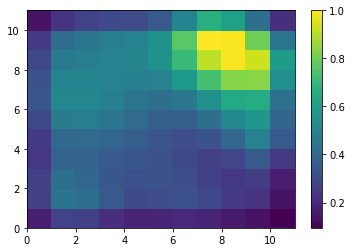

In [79]:
pcolor(som.distance_map().T)
colorbar();

In [80]:
markers = ['o', 's']
color = ['r', 'g']

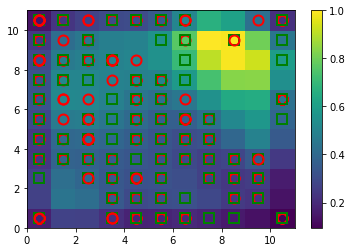

In [84]:
pcolor(som.distance_map().T)
colorbar();
for i, a in enumerate(x):
  w = som.winner(a);
  plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]],
       markerfacecolor = 'None', markersize = 10,
       markeredgecolor = color[y[i]], markeredgewidth = 2)